In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,r,spark,aws,hadoop,apache,sas,excel,job_simp,seniority,desc_leng,num_comp
0,Data Scientist,$112K-$133K (Glassdoor est.),"About Us:\r\n\r\nLocated in Allen, TX Cytracom...",5.0,Cytracom\r\n5.0,"Allen, TX","Allen, TX",1 to 50 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,"RingCentral, Nextiva, 8x8",112,133,122.5,Cytracom,TX,1,12,1,0,0,0,0,0,0,0,data scientist,na,2462,3
1,"Data Scientist (Palo Alto, CA or Remote US)",$112K-$133K (Glassdoor est.),The Opportunity\r\n\r\nEversight is the recogn...,4.2,Eversight\r\n4.2,Remote,"Palo Alto, CA",51 to 200 employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),-1,112,133,122.5,Eversight,na,0,7,1,0,0,0,0,0,0,0,data scientist,na,3899,0
2,Data Scientist,$112K-$133K (Glassdoor est.),Entefy’s Senior Data Scientist is a highly vis...,4.3,Entefy\r\n4.3,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,112,133,122.5,Entefy,CA,1,8,1,0,0,0,0,0,0,0,data scientist,na,1188,0
3,Data Scientist,$112K-$133K (Glassdoor est.),Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.0,Dun & Bradstreet\r\n3.0,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Public,IT Services,Information Technology,$1 to $2 billion (USD),"Experian, Equifax",112,133,122.5,Dun & Bradstreet,TX,0,179,1,0,0,0,0,0,1,0,data scientist,na,3527,2
4,Data Scientist,$112K-$133K (Glassdoor est.),We're searching for Enterprise and R&D data sc...,-1.0,Brilliant Leap,"Paramus, NJ",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,112,133,122.5,Brilliant Leap,NJ,0,-1,1,0,1,1,1,1,1,0,data scientist,na,4332,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'manager' in title.lower() or 'chief' in title.lower() or 'director' in title.lower() or 'vp' in title.lower() or 'principal' in title.lower():
        return 'manager'
    if 'analyst' in title.lower():
        return 'analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower() or 'ai' in title.lower() or 'artificial intelligence' in title.lower() or 'deep' in title.lower():
        return 'mle/ai'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'manager' in title.lower() or 'lead' in title.lower() or 'chief' in title.lower() or 'director' in title.lower() or 'vp' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'early' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    1897
mle/ai              59
manager             38
analyst              5
data engineer        1
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        1308
senior     690
jr           2
Name: seniority, dtype: int64

In [8]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,r,spark,aws,hadoop,apache,sas,excel,job_simp,seniority,desc_leng,num_comp
0,Data Scientist,$112K-$133K (Glassdoor est.),"About Us:\r\n\r\nLocated in Allen, TX Cytracom...",5.0,Cytracom\r\n5.0,"Allen, TX","Allen, TX",1 to 50 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,"RingCentral, Nextiva, 8x8",112,133,122.5,Cytracom,TX,1,12,1,0,0,0,0,0,0,0,data scientist,na,2462,3
1,"Data Scientist (Palo Alto, CA or Remote US)",$112K-$133K (Glassdoor est.),The Opportunity\r\n\r\nEversight is the recogn...,4.2,Eversight\r\n4.2,Remote,"Palo Alto, CA",51 to 200 employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),-1,112,133,122.5,Eversight,na,0,7,1,0,0,0,0,0,0,0,data scientist,na,3899,0
2,Data Scientist,$112K-$133K (Glassdoor est.),Entefy’s Senior Data Scientist is a highly vis...,4.3,Entefy\r\n4.3,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,112,133,122.5,Entefy,CA,1,8,1,0,0,0,0,0,0,0,data scientist,na,1188,0
3,Data Scientist,$112K-$133K (Glassdoor est.),Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.0,Dun & Bradstreet\r\n3.0,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Public,IT Services,Information Technology,$1 to $2 billion (USD),"Experian, Equifax",112,133,122.5,Dun & Bradstreet,TX,0,179,1,0,0,0,0,0,1,0,data scientist,na,3527,2
4,Data Scientist,$112K-$133K (Glassdoor est.),We're searching for Enterprise and R&D data sc...,-1.0,Brilliant Leap,"Paramus, NJ",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,112,133,122.5,Brilliant Leap,NJ,0,-1,1,0,1,1,1,1,1,0,data scientist,na,4332,0


In [9]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python               0
r                    0
spark                0
aws                  0
hadoop               0
apache               0
sas                  0
excel                0
job_simp             0
seniority            0
desc_leng            0
num_comp             0
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df['desc_leng'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(','))if x != '-1' else 0)

In [13]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python,r,spark,aws,hadoop,apache,sas,excel,desc_leng,num_comp
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.20750,1481.100500,106.170000,150.835000,128.502500,0.36600,27.333500,0.81250,0.178000,0.241000,0.109000,0.2000,0.020000,0.112000,0.408000,3691.154000,0.592000
std,1.73243,863.597809,20.094402,23.010313,20.912315,0.48183,41.609758,0.39041,0.382608,0.427797,0.311717,0.4001,0.140035,0.315445,0.491586,1517.365563,1.135861
min,-1.00000,-1.000000,52.000000,90.000000,72.000000,0.00000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,3.10000,-1.000000,89.000000,135.000000,113.500000,0.00000,-1.000000,1.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,2653.750000,0.000000
50%,3.80000,1990.000000,122.000000,168.000000,145.000000,0.00000,11.000000,1.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,3743.000000,0.000000
75%,4.10000,2009.000000,122.000000,168.000000,145.000000,1.00000,28.000000,1.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,4703.000000,0.000000
max,5.00000,2019.000000,122.000000,179.000000,145.000000,1.00000,239.000000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,9334.000000,3.000000


In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

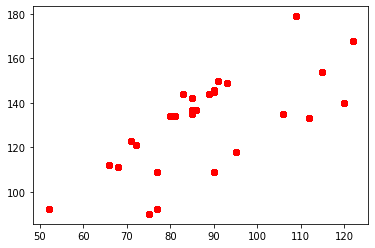

In [15]:
plt.plot(df['min_salary'], df['max_salary'], 'ro')

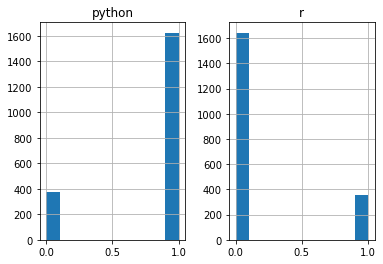

In [16]:
hist = df[['python', 'r']].hist()

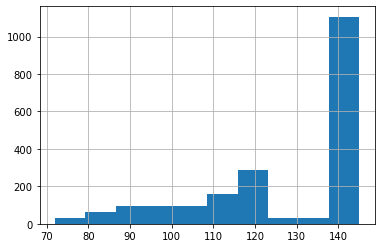

In [17]:
df['avg_salary'].hist()

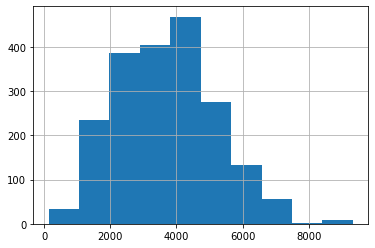

In [18]:
df['desc_leng'].hist()

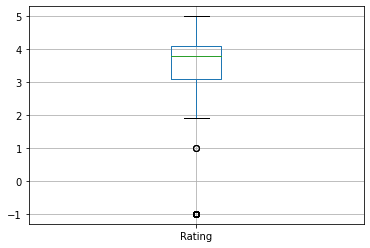

In [19]:
df.boxplot(column=['Rating'])

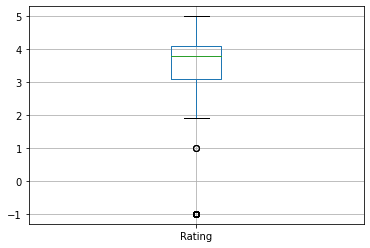

In [20]:
df.boxplot(column=['Rating'])

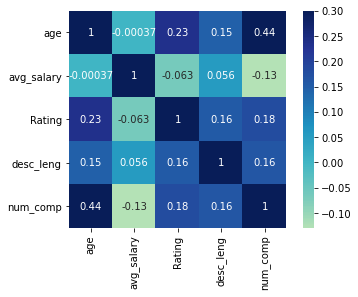

In [21]:
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_leng', 'num_comp']].corr(), 
            cmap="YlGnBu", annot=True, vmax = 0.3, center = 0, square = True,)

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 
    'Sector', 'Revenue', 'company_txt', 'job_state', 'python', 'r', 
    'spark', 'aws', 'hadoop', 'apache', 'sas', 'excel', 'job_simp', 'seniority']]

In [24]:
# for i in df_cat:
#     cut_num = df_cat[i].value_counts()
#     print('graph for %s: total = %d' % (i, len(cut_num)))
#     chart = sns.barplot(x = cut_num.index, y = cut_num, data = df_cat)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#     plt.show()

In [25]:
# for i in df_cat[['job_state', 'Location', 'Headquarters', 'company_txt']]:
#     cut_num = df_cat[i].value_counts()[:20]
#     print('graph for %s: total = %d' % (i, len(cut_num)))
#     chart = sns.barplot(x = cut_num.index, y = cut_num, data = df_cat)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#     plt.show()

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

In [27]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,102.900000
data engineer,116.500000
data scientist,129.000000
manager,107.013158
mle/ai,128.720339


In [28]:
pd.pivot_table(df, index = ['job_state'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,352
VA,196
NY,165
IL,147
na,140
WA,129
NJ,124
MA,93
CT,78


In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache',
       'sas', 'excel', 'job_simp', 'seniority', 'desc_leng', 'num_comp'],
      dtype='object')

In [30]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python', 'r', 'spark', 'aws', 'hadoop', 'apache', 'Type of ownership', 'avg_salary']]

In [31]:
# for i in df_pivots.columns[:-1]:
#     print(i)
#     print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

In [32]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),11,91
$1 to $5 million (USD),9,29
$10 to $25 million (USD),57,125
$10+ billion (USD),61,170
$100 to $500 million (USD),11,184
$2 to $5 billion (USD),6,69
$25 to $50 million (USD),11,37
$5 to $10 billion (USD),3,78
$5 to $10 million (USD),4,15


In [33]:
pd.pivot_table(df_pivots, index = 'r', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
r,,
0,366,1278
1,9,347


In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [35]:
# words = " ".join(df['Job Description'])

# def punctuation_stop(text):
#     """remove punctuation and stop words"""
#     filtered = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     for w in word_tokens:
#         if w not in stop_words and w.isalpha():
#             filtered.append(w.lower())
#     return filtered


# words_filtered = punctuation_stop(words)

# text = " ".join([ele for ele in words_filtered])

# wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
# wc.generate(text)

# plt.figure(figsize=[10,10])
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [36]:
df.to_csv('glassdoor_jobs_cleaned.csv', index = False)

In [37]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,r,spark,aws,hadoop,apache,sas,excel,job_simp,seniority,desc_leng,num_comp
0,Data Scientist,$112K-$133K (Glassdoor est.),"About Us:\r\n\r\nLocated in Allen, TX Cytracom...",5.0,Cytracom\r\n5.0,"Allen, TX","Allen, TX",1 to 50 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,"RingCentral, Nextiva, 8x8",112,133,122.5,Cytracom,TX,1,12,1,0,0,0,0,0,0,0,data scientist,na,2494,3
1,"Data Scientist (Palo Alto, CA or Remote US)",$112K-$133K (Glassdoor est.),The Opportunity\r\n\r\nEversight is the recogn...,4.2,Eversight\r\n4.2,Remote,"Palo Alto, CA",51 to 200 employees,2013,Company - Private,Enterprise Software & Network Solutions,Information Technology,$10 to $25 million (USD),-1,112,133,122.5,Eversight,na,0,7,1,0,0,0,0,0,0,0,data scientist,na,3940,0
2,Data Scientist,$112K-$133K (Glassdoor est.),Entefy’s Senior Data Scientist is a highly vis...,4.3,Entefy\r\n4.3,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,112,133,122.5,Entefy,CA,1,8,1,0,0,0,0,0,0,0,data scientist,na,1202,0
3,Data Scientist,$112K-$133K (Glassdoor est.),Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.0,Dun & Bradstreet\r\n3.0,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Public,IT Services,Information Technology,$1 to $2 billion (USD),"Experian, Equifax",112,133,122.5,Dun & Bradstreet,TX,0,179,1,0,0,0,0,0,1,0,data scientist,na,3556,2
4,Data Scientist,$112K-$133K (Glassdoor est.),We're searching for Enterprise and R&D data sc...,-1.0,Brilliant Leap,"Paramus, NJ",-1,Unknown,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,112,133,122.5,Brilliant Leap,NJ,0,-1,1,0,1,1,1,1,1,0,data scientist,na,4363,0


In [38]:
df.to_csv('glassdoor_jobs_cleaned_eda.csv', index = False)